In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Total_population.jpg


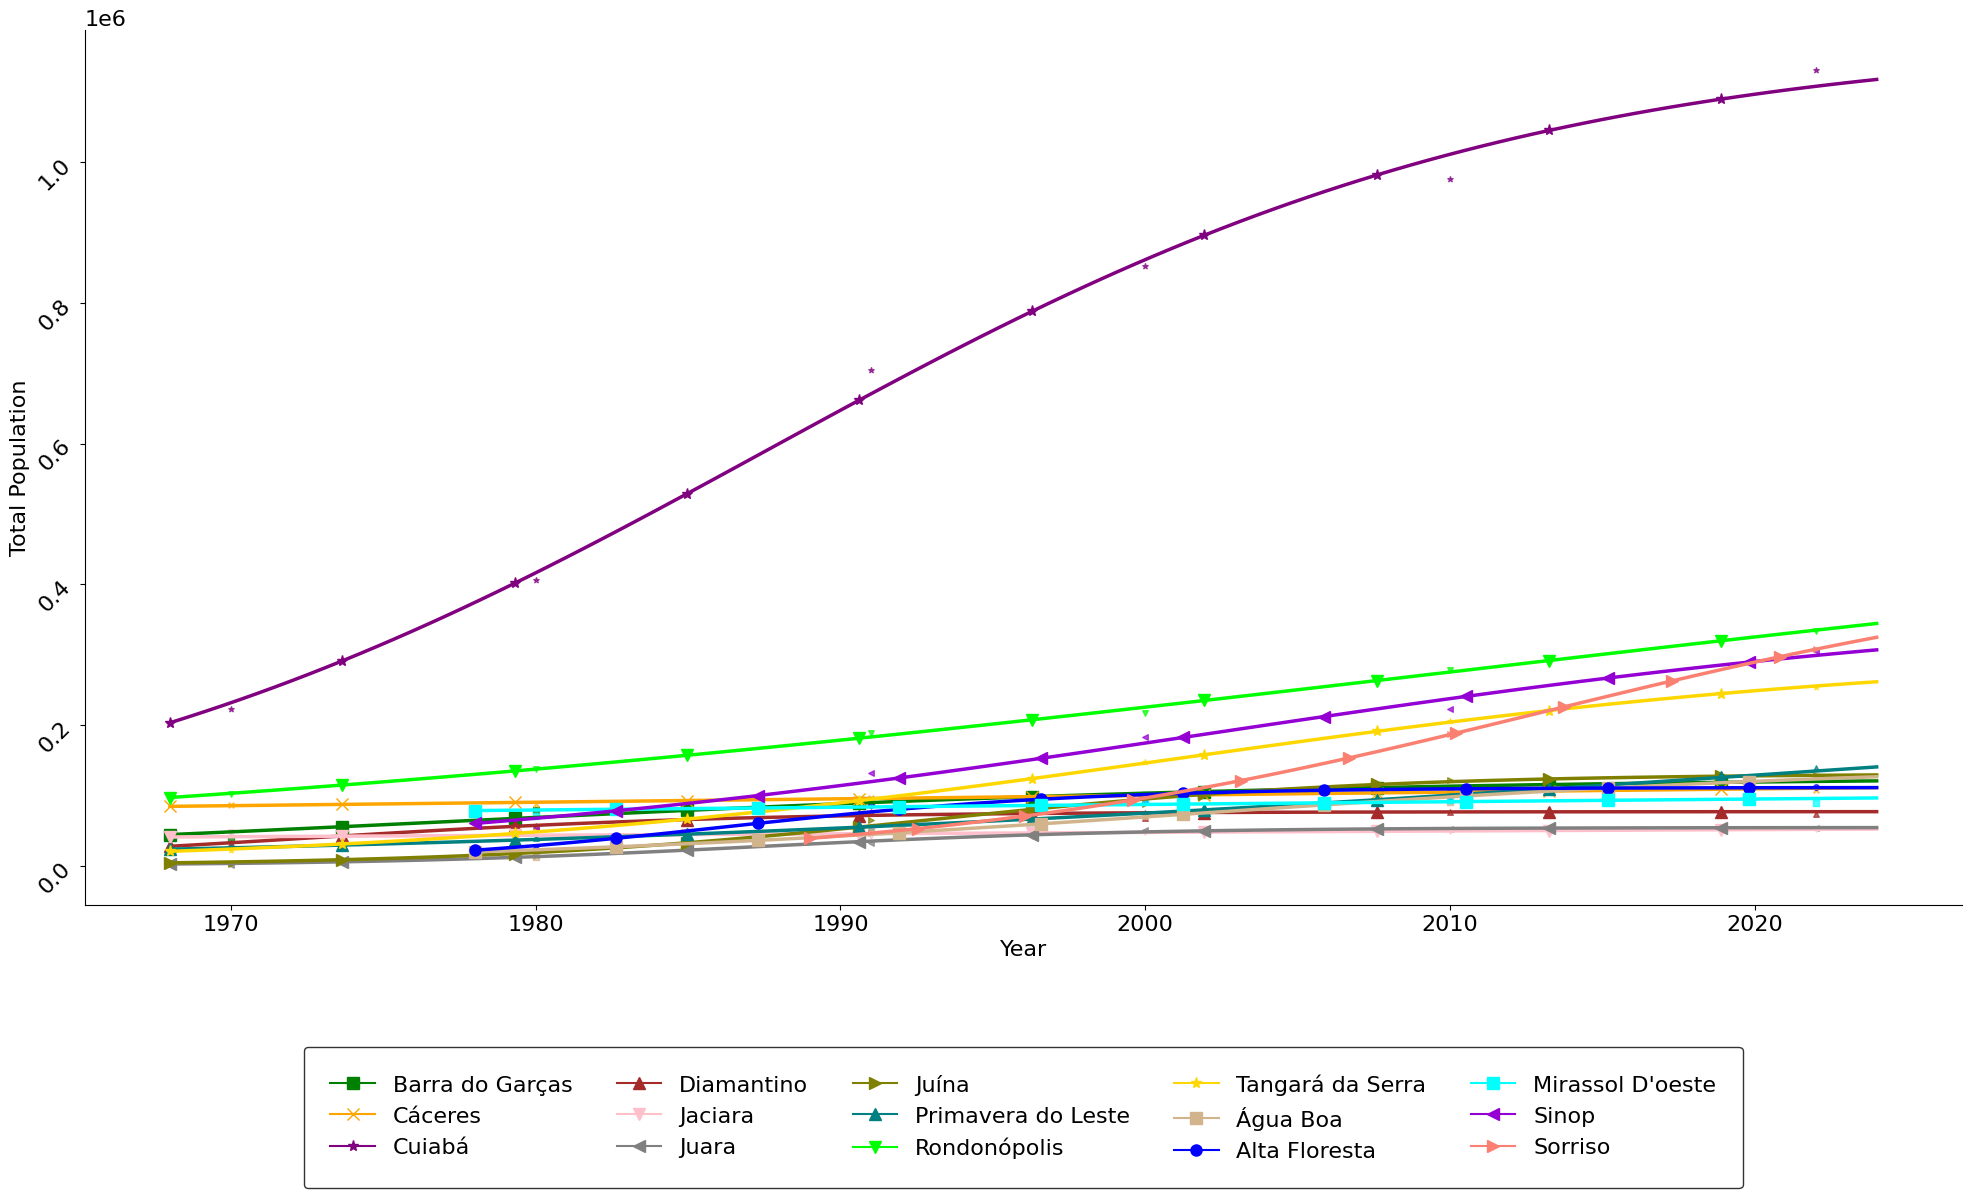

(<Figure size 2000x1600 with 1 Axes>,
 <Axes: xlabel='Year', ylabel='Total Population'>)

In [2]:
def create_logistic_fit_plot_with_markers(file_path, sheet_name="Planilha2", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves a plot with logistic fits for total population by region.
    Legend uses the same styles as the plot lines.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Region styles with color and marker
    region_styles = {
        'Alta Floresta': ('blue', 'o'),
        'Barra do Garças': ('green', 's'),
        'Confresa - Vila Rica': ('red', 'd'),
        'Cuiabá': ('purple', '*'),  
        'Cáceres': ('orange', 'x'),
        'Diamantino': ('brown', '^'),  
        'Jaciara': ('pink', 'v'),       
        'Juara': ('gray', '<'),         
        'Juína': ('olive', '>'),        
        'Mirassol D\'oeste': ('cyan', 's'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
        'Primavera do Leste': ('teal', '^'),  
        'Rondonópolis': ('lime', 'v'),      
        'Sinop': ('darkviolet', '<'),      
        'Sorriso': ('salmon', '>'),         
        'Tangará da Serra': ('gold', '*'),  
        'Água Boa': ('tan', 's')           
    }
    
    line_width = 2.5
    marker_size = 8
    marker_frequency = 10
    
    # Get available regions
    available_regions = df['Regions'].unique() if 'Regions' not in df.columns else df['Regions'].unique()
    plotted_regions = []
    
    # Create legend handles manually
    legend_handles = []
    
    # Plot each region
    for region in available_regions:
        if region not in region_styles:
            continue
            
        region_df = df[df['Regions'] == region] if 'Regions' in df.columns else df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:
            continue
            
        color, marker = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)
        
        # Create a legend entry for this region
        legend_entry = plt.Line2D([], [], color=color, marker=marker, linestyle='-',
                                 markersize=marker_size, label=region)
        legend_handles.append(legend_entry)
        
        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)
                
                # Plot fitted line and markers
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
                continue
            except:
                pass
                
        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])
                
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
        except:
            pass
    
    # Format the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Population')
    plt.yticks(rotation=45)
    
    # Create legend using our custom handles
    legend = ax.legend(
        handles=legend_handles,
        fontsize=16,
        ncol=5,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save the plot
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
        print(f"Plot saved to: {output_path}")
    
    if show_plot:
        plt.show()
    
    plt.close(fig)
    return fig, ax

# Run the function with your specified paths
input_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Dados do Censo - não usar na regressão\População total.xlsx"
output_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Total_population.jpg"

create_logistic_fit_plot_with_markers(
    file_path=input_path,
    sheet_name="Planilha2",
    output_path=output_path,
    show_plot=True
)

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Total_Population-excluding Cuiabá.jpg


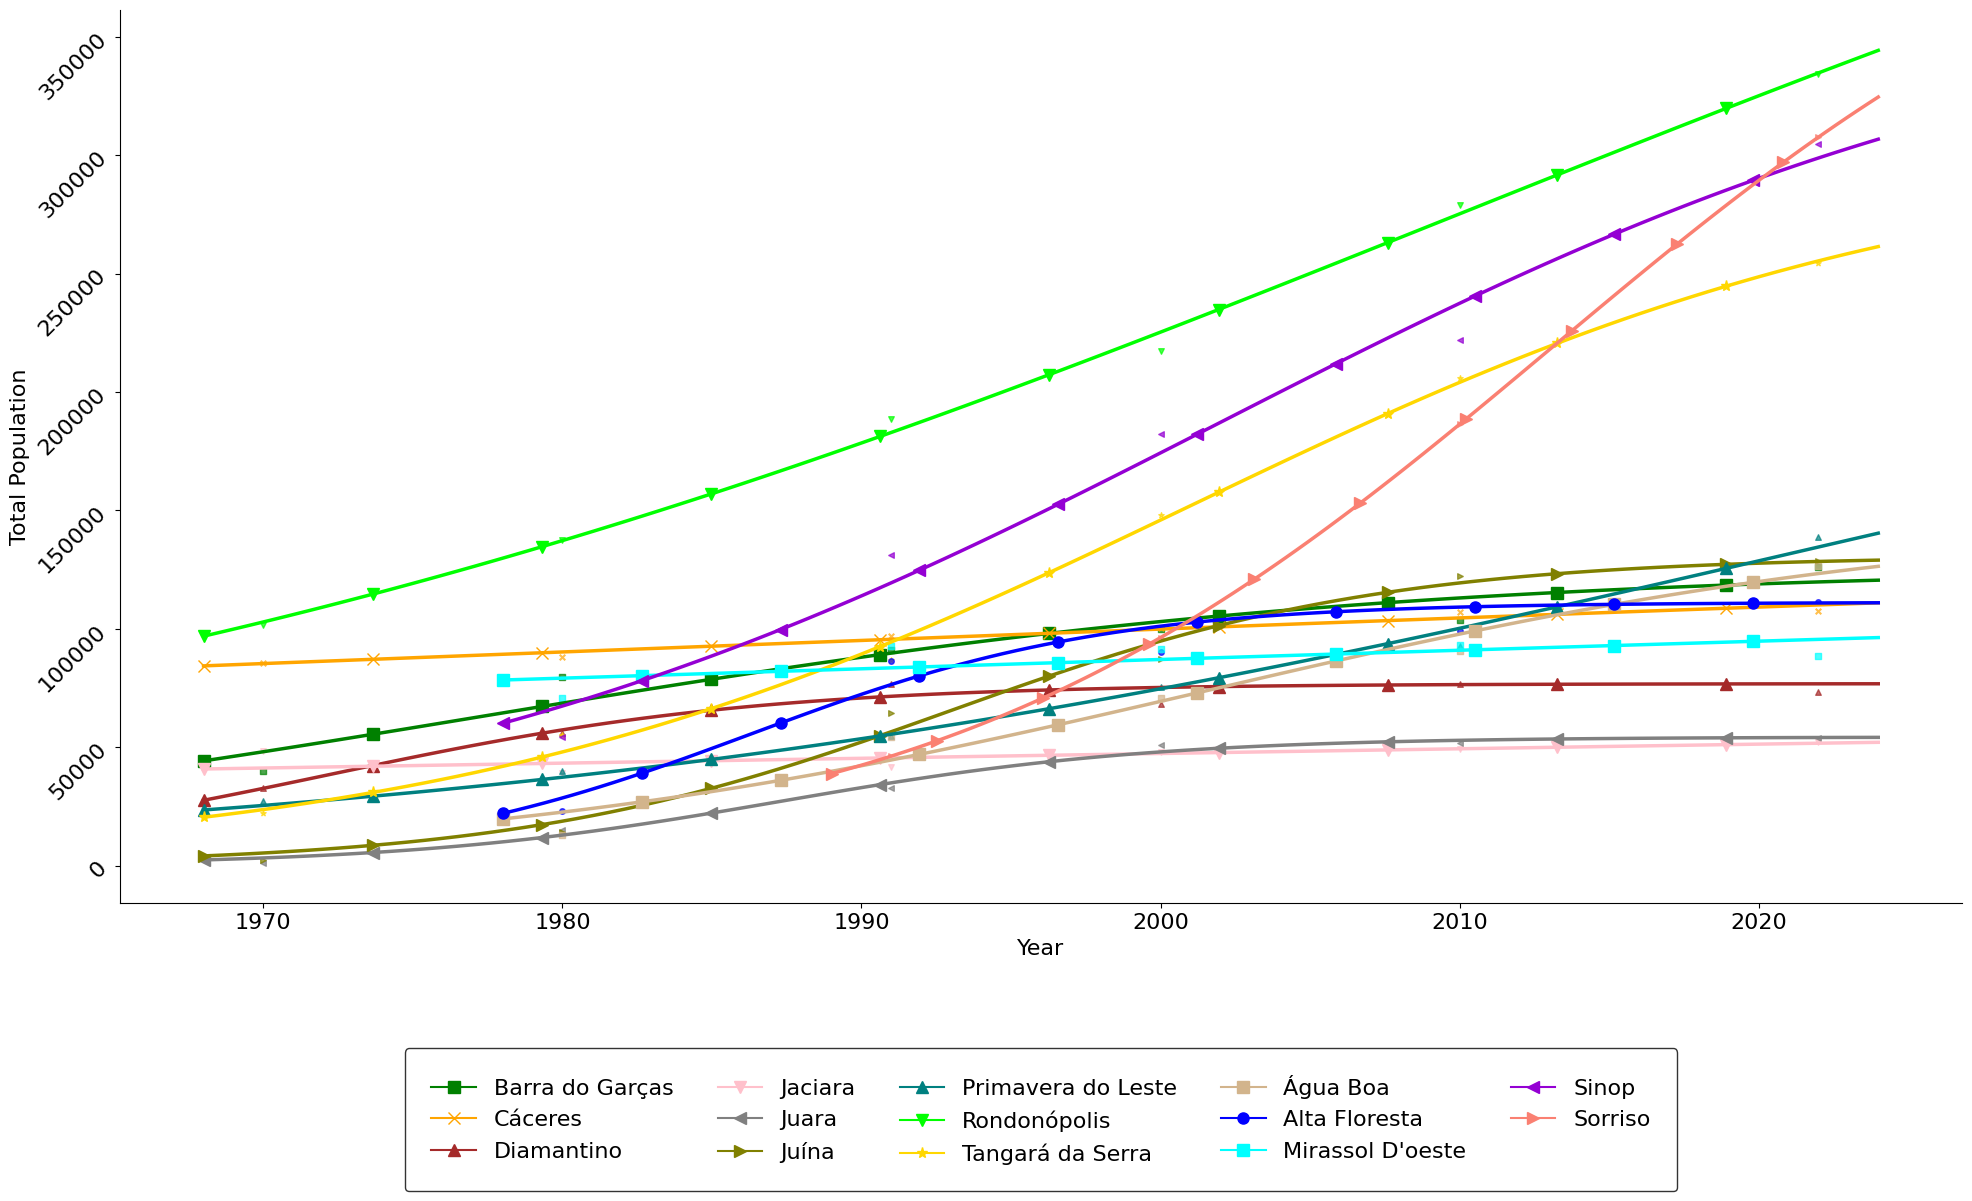

(<Figure size 2000x1600 with 1 Axes>,
 <Axes: xlabel='Year', ylabel='Total Population'>)

In [3]:
def create_logistic_fit_plot_with_markers(file_path, sheet_name="Planilha2", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves a plot with logistic fits for total population by region.
    Legend uses the same styles as the plot lines.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Region styles with color and marker
    region_styles = {
        'Alta Floresta': ('blue', 'o'),
        'Barra do Garças': ('green', 's'),
        'Confresa - Vila Rica': ('red', 'd'),
        'Cuiabá': ('purple', '*'),  
        'Cáceres': ('orange', 'x'),
        'Diamantino': ('brown', '^'),  
        'Jaciara': ('pink', 'v'),       
        'Juara': ('gray', '<'),         
        'Juína': ('olive', '>'),        
        'Mirassol D\'oeste': ('cyan', 's'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
        'Primavera do Leste': ('teal', '^'),  
        'Rondonópolis': ('lime', 'v'),      
        'Sinop': ('darkviolet', '<'),      
        'Sorriso': ('salmon', '>'),         
        'Tangará da Serra': ('gold', '*'),  
        'Água Boa': ('tan', 's')           
    }
    
    line_width = 2.5
    marker_size = 8
    marker_frequency = 10
    
    # Get available regions
    available_regions = df['Regions'].unique() if 'Regions' in df.columns else df['Regions'].unique()
    plotted_regions = []
    
    # Create legend handles manually
    legend_handles = []
    
    # Plot each region
    for region in available_regions:
        # Skip Cuiabá
        if region == 'Cuiabá':
            continue
            
        if region not in region_styles:
            continue
            
        region_df = df[df['Regions'] == region] if 'Regions' in df.columns else df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:
            continue
            
        color, marker = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)
        
        # Create a legend entry for this region
        legend_entry = plt.Line2D([], [], color=color, marker=marker, linestyle='-',
                                 markersize=marker_size, label=region)
        legend_handles.append(legend_entry)
        
        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)
                
                # Plot fitted line and markers
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
                continue
            except:
                pass
                
        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])
                
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
        except:
            pass
    
    # Format the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Population')
    plt.yticks(rotation=45)
    
    # Create legend using our custom handles
    legend = ax.legend(
        handles=legend_handles,
        fontsize=16,
        ncol=5,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save the plot
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
        print(f"Plot saved to: {output_path}")
    
    if show_plot:
        plt.show()
    
    plt.close(fig)
    return fig, ax

# Run the function with your specified paths
input_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Dados do Censo - não usar na regressão\População total.xlsx"
output_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Total_Population-excluding Cuiabá.jpg"

create_logistic_fit_plot_with_markers(
    file_path=input_path,
    sheet_name="Planilha2",
    output_path=output_path,
    show_plot=True
)

In [28]:

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_logistic_fit_plot_with_markers(file_path, sheet_name="Planilha2", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves a plot with logistic fits for total population by region.
    This version uses Plotly for an interactive chart.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Region styles with color and marker
    region_styles = {
        'Alta Floresta': ('blue', 'circle'),
        'Barra do Garças': ('green', 'square'),
        'Confresa - Vila Rica': ('red', 'diamond'),
        'Cuiabá': ('purple', 'star'),
        'Cáceres': ('orange', 'x'),
        'Diamantino': ('brown', 'triangle-up'),
        'Jaciara': ('pink', 'triangle-down'),
        'Juara': ('gray', 'triangle-left'),
        'Juína': ('olive', 'triangle-right'),
        'Mirassol D\'oeste': ('cyan', 'square'),
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', 'star'),
        'Pontes e Lacerda - Comodoro': ('yellow', 'diamond'),
        'Primavera do Leste': ('teal', 'triangle-up'),
        'Rondonópolis': ('lime', 'triangle-down'),
        'Sinop': ('darkviolet', 'triangle-left'),
        'Sorriso': ('salmon', 'triangle-right'),
        'Tangará da Serra': ('gold', 'star'),
        'Água Boa': ('tan', 'square')
    }
    
    line_width = 2.5
    marker_size = 8
    marker_frequency = 10
    
    # Get available regions
    available_regions = df['Regions'].unique() if 'Regions' in df.columns else df['Regions'].unique()

    # Create figure
    fig = go.Figure()
    
    # Plot each region
    for region in available_regions:
        if region not in region_styles:
            continue
            
        region_df = df[df['Regions'] == region] if 'Regions' in df.columns else df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:
            continue
            
        color, marker = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)
        
        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)
                
                # Plot fitted line
                line_trace = go.Scatter(x=years_pred, y=pred, mode='lines', line=dict(color=color, width=line_width), name=region,
                                     hovertemplate='Year: %{x}<br>Population: %{y:.2f}') # removed visible = 'legendonly'
                fig.add_trace(line_trace)
                
                # Add a trace for the selected region (initially visible)
                #selected_line_trace = go.Scatter(x=years_pred, y=pred, mode='lines', line=dict(color=color, width=line_width), name=region,
                #                     hovertemplate='Year: %{x}<br>Population: %{y:.2f}', visible=True) # removed this line
                #fig.add_trace(selected_line_trace) # removed this line
                
                
                continue
            except:
                pass
        
        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])
                
                line_trace = go.Scatter(x=years_pred, y=pred, mode='lines', line=dict(color=color, width=line_width), name=region,
                                     hovertemplate='Year: %{x}<br>Population: %{y:.2f}') # removed visible = 'legendonly'
                fig.add_trace(line_trace)
                
                # Add a trace for the selected region (initially visible)
                #selected_line_trace = go.Scatter(x=years_pred, y=pred, mode='lines', line=dict(color=color, width=line_width), name=region,
                #                     hovertemplate='Year: %{x}<br>Population: %{y:.2f}', visible=True) # removed this line
                #fig.add_trace(selected_line_trace) # removed this line
        except:
            pass
    
    # Create list of all region names
    region_names = list(region_styles.keys())
    
    # Create dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(label=region_name,
                         method="update",
                         args=[{"visible": [trace.name == region_name  if trace.name == region_name  else False for trace in fig.data]},
                               {"title": f"Population Fit for {region_name}",
                                "showlegend": True if  any(trace.name == region_name  for trace in fig.data) else False}])
                    for region_name in region_names
                ]),
                direction="down",
                pad=dict(r=10, t=10),
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.1,
                yanchor="top",
            )
        ],
        title='Total Population with Logistic and Exponential Fits',
        xaxis_title='Year',
        yaxis_title='Total Population',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.4,
            xanchor="center",
            x=0.5,
            font=dict(size=16),
            traceorder="normal"
        ),
        font=dict(size=16),
        plot_bgcolor='white',
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        showlegend=True
    )
    
    # Save the plot
    if output_path:
        fig.write_html(output_path)
        print(f"Plot saved to: {output_path}")
    
    if show_plot:
        fig.show()
    
    return fig

# Run the function with your specified paths
input_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Dados do Censo - não usar na regressão\População total.xlsx"
output_path = "Total_population_interactive.html" # Changed to .html

create_logistic_fit_plot_with_markers(
    file_path=input_path,
    sheet_name="Planilha2",
    output_path=output_path,
    show_plot=True # Changed to false, the file is saved.
)


Plot saved to: Total_population_interactive.html
